# Detection with CNNClassifier: Augmentation


In [1]:
from dotenv import load_dotenv

load_dotenv()

import sys
import os

sys.path.append(os.getenv('SRC_DIR'))

from utils.system import display_system_info

display_system_info(markdown=True)


**Last Updated**: 2025-04-28 20:48:59

**Python Version**: 3.11.8  
**OS**: Windows 10.0.26100  
**Architecture**: 64bit  
**Hostname**: Gan  
**Processor**: Intel64 Family 6 Model 186 Stepping 3, GenuineIntel  
**RAM Size**: 15.65 GB  
  
        

In [2]:
from torchvision import transforms
import torch
import cv2
from PIL import Image
import numpy as np

from classify import TorchClassifier

In [4]:
model_config = {
    'num_classes': 3,
    'num_blocks': 4,
    'first_out_channel': 32,
    'out_channel_multiplier': 2,
    'kernel_size': 3,
    'stride': 1,
    'padding': 1,
    'input_shape': (3, 128, 128)
}

model = TorchClassifier(model='CNNClassifier', config=model_config, device='auto', verbose=True)

New model created: CNNClassifier(
  (features): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (1): ConvBlock(
      (block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (2): ConvBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [5]:
aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1))
])

enhance_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [6]:
results = model.train(
    data_path=os.getenv('ROI_DATA_DIR'),
    imbalance=True,
    fraction=1,
    val_test_ratio=0.5,
    input_size=128,
    optimizer='Adam',
    lr=1e-4,
    aug_transform=aug_transform,
    enhance_transform=enhance_transform,
    val_transform=val_transform,
    batch_size=32,
    epochs=5
) 

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        1/5     0.2976      88.71     0.8874     0.8876     0.8875     0.8874     0.8876     0.8875: 100%|██████████| 552/552 [05:51<00:00,  1.57it/s]


                  Loss


                0.1281: 100%|██████████| 37/37 [00:07<00:00,  4.66it/s]


              precision    recall  f1-score   support

    drowning     0.9806    0.8352    0.9021       182
    swimming     0.9552    0.9899    0.9722       690
  treadwater     0.9268    0.9333    0.9301       285

    accuracy                         0.9516      1157
   macro avg     0.9542    0.9195    0.9348      1157
weighted avg     0.9522    0.9516    0.9508      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        2/5     0.1873      93.31     0.9336     0.9336     0.9336     0.9336     0.9336     0.9336: 100%|██████████| 552/552 [05:41<00:00,  1.62it/s]


                  Loss


               0.09959: 100%|██████████| 37/37 [00:09<00:00,  3.80it/s]


              precision    recall  f1-score   support

    drowning     0.9588    0.8956    0.9261       182
    swimming     0.9633    0.9884    0.9757       690
  treadwater     0.9462    0.9263    0.9362       285

    accuracy                         0.9585      1157
   macro avg     0.9561    0.9368    0.9460      1157
weighted avg     0.9584    0.9585    0.9582      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        3/5      0.138       95.2     0.9526     0.9526     0.9526     0.9526     0.9526     0.9526: 100%|██████████| 552/552 [05:05<00:00,  1.81it/s]


                  Loss


               0.07481: 100%|██████████| 37/37 [00:07<00:00,  4.84it/s]


              precision    recall  f1-score   support

    drowning     0.9355    0.9560    0.9457       182
    swimming     0.9927    0.9870    0.9898       690
  treadwater     0.9544    0.9544    0.9544       285

    accuracy                         0.9741      1157
   macro avg     0.9609    0.9658    0.9633      1157
weighted avg     0.9743    0.9741    0.9741      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        4/5     0.1258      95.72     0.9578     0.9577     0.9578     0.9578     0.9577     0.9578: 100%|██████████| 552/552 [06:24<00:00,  1.44it/s]


                  Loss


               0.07085: 100%|██████████| 37/37 [00:09<00:00,  3.79it/s]


              precision    recall  f1-score   support

    drowning     0.9508    0.9560    0.9534       182
    swimming     0.9871    0.9942    0.9906       690
  treadwater     0.9749    0.9544    0.9645       285

    accuracy                         0.9784      1157
   macro avg     0.9709    0.9682    0.9695      1157
weighted avg     0.9784    0.9784    0.9783      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        5/5     0.1228      95.75     0.9581     0.9581     0.9581     0.9581     0.9581     0.9581: 100%|██████████| 552/552 [06:27<00:00,  1.43it/s]


                  Loss


               0.07274: 100%|██████████| 37/37 [00:08<00:00,  4.33it/s]

              precision    recall  f1-score   support

    drowning     0.9558    0.9505    0.9532       182
    swimming     0.9870    0.9913    0.9892       690
  treadwater     0.9647    0.9579    0.9613       285

    accuracy                         0.9767      1157
   macro avg     0.9692    0.9666    0.9679      1157
weighted avg     0.9766    0.9767    0.9766      1157



In [7]:
results

([{'loss': 0.30127776388510846,
   'accuracy': 88.71004307413286,
   'macro_f1': 0.887454334224029,
   'weighted_f1': 0.887454334224029,
   'macro_precision': 0.8873417172453872,
   'weighted_precision': 0.8873417172453874,
   'macro_recall': 0.8876034932516729,
   'weighted_recall': 0.8876034932516729},
  {'loss': 0.18731568885319258,
   'accuracy': 93.3121741101791,
   'macro_f1': 0.9336022443308911,
   'weighted_f1': 0.933602244330891,
   'macro_precision': 0.9335755907135129,
   'weighted_precision': 0.9335755907135127,
   'macro_recall': 0.9336509016672337,
   'weighted_recall': 0.9336509016672337},
  {'loss': 0.13789818553334993,
   'accuracy': 95.20516889594197,
   'macro_f1': 0.9525997734187119,
   'weighted_f1': 0.9525997734187119,
   'macro_precision': 0.9526112566353152,
   'weighted_precision': 0.952611256635315,
   'macro_recall': 0.9525915844391516,
   'weighted_recall': 0.9525915844391516},
  {'loss': 0.12566533451899886,
   'accuracy': 95.72092496032646,
   'macro_f1': 

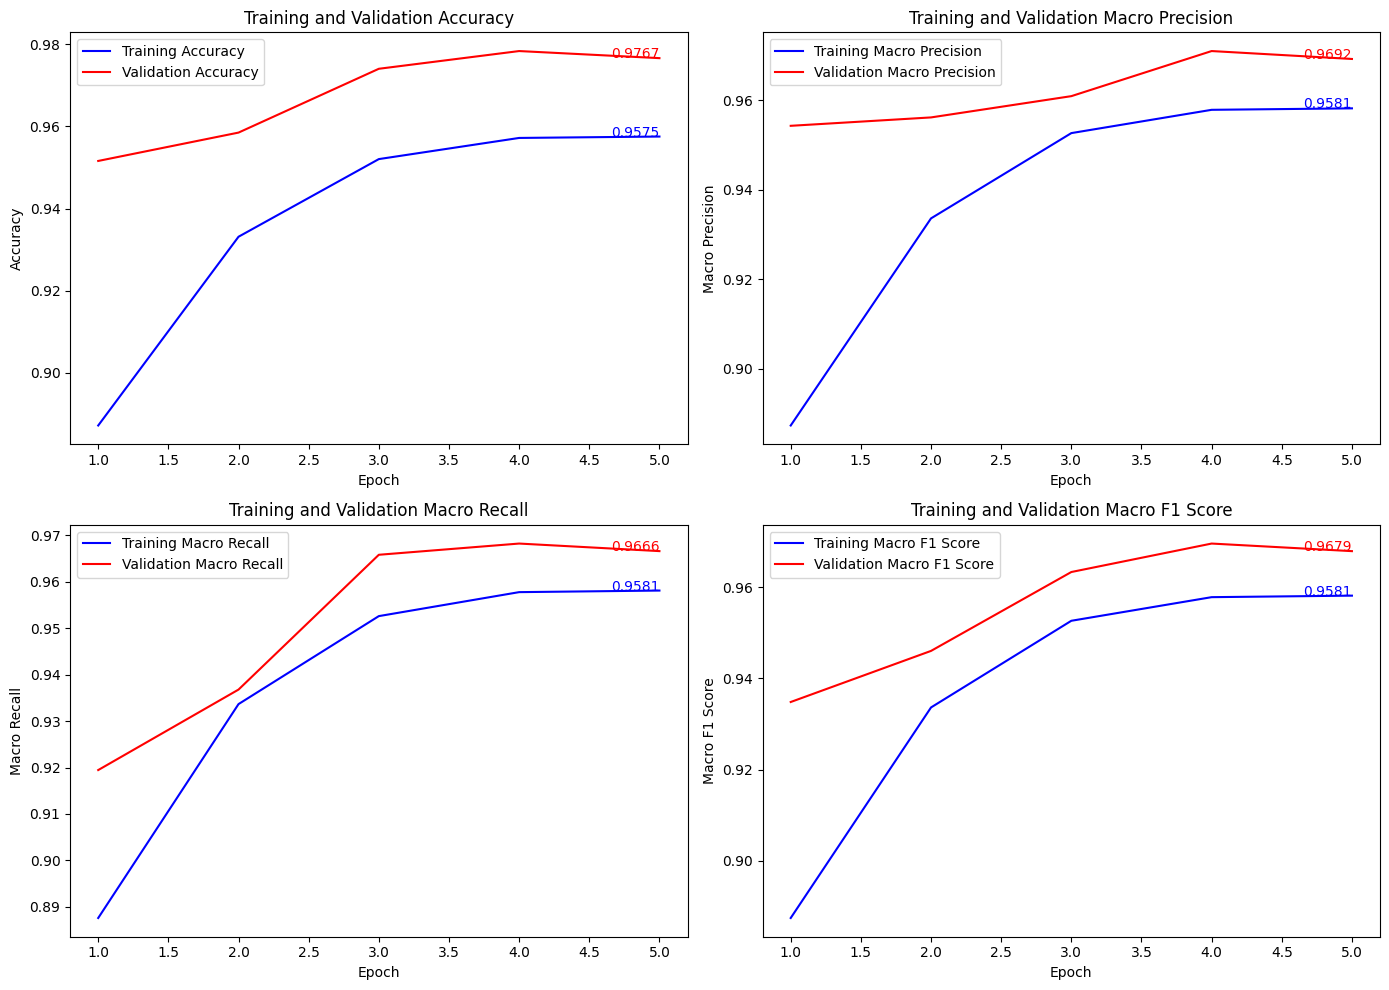

In [8]:
import matplotlib.pyplot as plt

# Split results into training and validation metrics
train_metrics, validation_metrics = results

# Extract training metrics
train_accuracy = [epoch['accuracy'] / 100 for epoch in train_metrics]
train_macro_precision = [epoch['macro_precision'] for epoch in train_metrics]
train_macro_recall = [epoch['macro_recall'] for epoch in train_metrics]
train_macro_f1 = [epoch['macro_f1'] for epoch in train_metrics]

# Extract validation metrics
validation_accuracy = [epoch['accuracy'] for epoch in validation_metrics]
validation_macro_precision = [epoch['macro avg']['precision'] for epoch in validation_metrics]
validation_macro_recall = [epoch['macro avg']['recall'] for epoch in validation_metrics]
validation_macro_f1 = [epoch['macro avg']['f1-score'] for epoch in validation_metrics]

# Create epoch list
epochs = range(1, len(train_accuracy) + 1)

# Set up the figure for 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Wider figure
axs = axs.flatten()  # Flatten to easily index with a single number

# Plotting Accuracy
axs[0].plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
axs[0].plot(epochs, validation_accuracy, label='Validation Accuracy', color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[0].text(epochs[-1], train_accuracy[-1], f'{train_accuracy[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[0].text(epochs[-1], validation_accuracy[-1], f'{validation_accuracy[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting Precision
axs[1].plot(epochs, train_macro_precision, label='Training Macro Precision', color='blue')
axs[1].plot(epochs, validation_macro_precision, label='Validation Macro Precision', color='red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Macro Precision')
axs[1].set_title('Training and Validation Macro Precision')
axs[1].legend()
axs[1].text(epochs[-1], train_macro_precision[-1], f'{train_macro_precision[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[1].text(epochs[-1], validation_macro_precision[-1], f'{validation_macro_precision[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting Recall
axs[2].plot(epochs, train_macro_recall, label='Training Macro Recall', color='blue')
axs[2].plot(epochs, validation_macro_recall, label='Validation Macro Recall', color='red')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Macro Recall')
axs[2].set_title('Training and Validation Macro Recall')
axs[2].legend()
axs[2].text(epochs[-1], train_macro_recall[-1], f'{train_macro_recall[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[2].text(epochs[-1], validation_macro_recall[-1], f'{validation_macro_recall[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting F1 Score
axs[3].plot(epochs, train_macro_f1, label='Training Macro F1 Score', color='blue')
axs[3].plot(epochs, validation_macro_f1, label='Validation Macro F1 Score', color='red')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Macro F1 Score')
axs[3].set_title('Training and Validation Macro F1 Score')
axs[3].legend()
axs[3].text(epochs[-1], train_macro_f1[-1], f'{train_macro_f1[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[3].text(epochs[-1], validation_macro_f1[-1], f'{validation_macro_f1[-1]:.4f}', color='red', fontsize=10, ha='right')

plt.tight_layout()
plt.show()


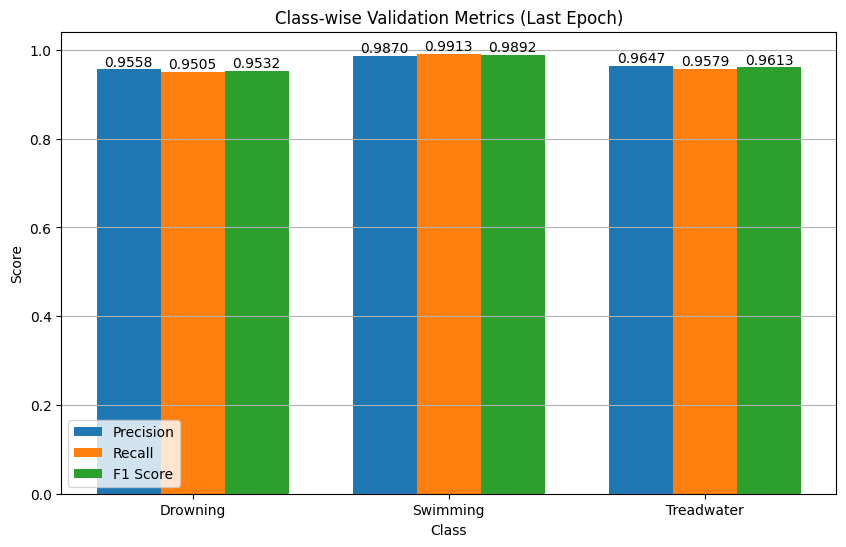

In [9]:
# Validation metrics (final epoch)
final_validation_metric = validation_metrics[-1]

# Extracting precision, recall, f1 for the three classes
classes = ['Drowning', 'Swimming', 'Treadwater']
precision = [final_validation_metric['drowning']['precision'],
             final_validation_metric['swimming']['precision'],
             final_validation_metric['treadwater']['precision']]

recall = [final_validation_metric['drowning']['recall'],
          final_validation_metric['swimming']['recall'],
          final_validation_metric['treadwater']['recall']]

f1_score = [final_validation_metric['drowning']['f1-score'],
            final_validation_metric['swimming']['f1-score'],
            final_validation_metric['treadwater']['f1-score']]

# Plotting classwise metrics (Precision, Recall, F1-Score)
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
bars_precision = ax.bar(x - width, precision, width, label='Precision')
bars_recall = ax.bar(x, recall, width, label='Recall')
bars_f1 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add values on top of each bar
for bar in bars_precision:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

for bar in bars_recall:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

for bar in bars_f1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Class-wise Validation Metrics (Last Epoch)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
ax.grid(axis='y')

# Display the plot
plt.show()

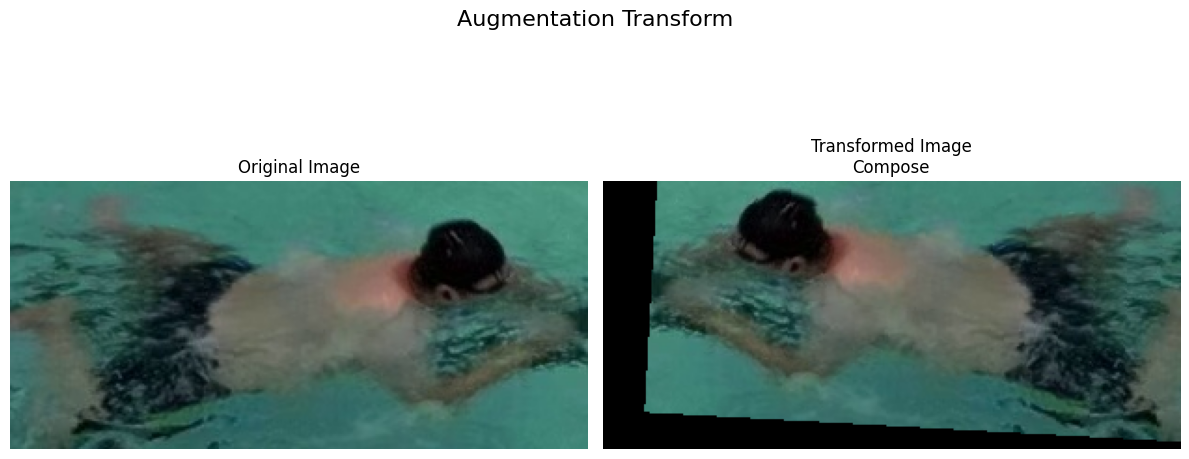

In [10]:
def visualize_transform(image, transform, figsize=(12, 6), title=None):
    # Convert input to PIL Image
    if isinstance(image, np.ndarray):
        image = Image.fromarray(np.uint8(image))
    elif isinstance(image, torch.Tensor):
        if image.dim() == 4:  # batch of images
            image = image[0]  # take first image from batch
        if image.shape[0] in [1, 3]:  # if channel-first format (C,H,W)
            image = image.permute(1, 2, 0)  # change to (H,W,C)
        image = Image.fromarray(np.uint8(image.numpy() * 255))

    # Apply transformation
    try:
        transformed_image = transform(image)
    except Exception as e:
        print(f"Error applying transformation: {e}")
        return None

    # Convert transformed image to numpy array if it's a tensor
    if isinstance(transformed_image, torch.Tensor):
        if transformed_image.dim() == 4:  # batch of images
            transformed_image = transformed_image[0]  # take first image from batch
        if transformed_image.shape[0] in [1, 3]:  # if channel-first format (C,H,W)
            transformed_image = transformed_image.permute(1, 2, 0)  # change to (H,W,C)
        transformed_image = transformed_image.numpy()

        # If image has values in [0,1], scale to [0,255]
        if transformed_image.max() <= 1.0:
            transformed_image = transformed_image * 255

        transformed_image = np.uint8(transformed_image)
        transformed_image = Image.fromarray(transformed_image)

    # Create the figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Set the main title if provided
    if title:
        fig.suptitle(title, fontsize=16)

    # Plot original image
    axes[0].imshow(np.array(image))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot transformed image
    axes[1].imshow(np.array(transformed_image))
    axes[1].set_title(f'Transformed Image\n{transform.__class__.__name__}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

img_for_vis = Image.open(os.path.join(os.getenv('ROI_DATA_DIR'), 'train', 'swimming', '000000.jpg'))
visualize_transform(img_for_vis, aug_transform, title='Augmentation Transform')

In [11]:
model.save(
    os.path.join(os.getenv('CNN_MODEL_DIR'), 'try_augmentation.pt')
)

Model saved to C:\Users\hp\Downloads\Drowning-Detection/models/classification/CNN\try_augmentation.pt


In [12]:
# Add model prediction here
loaded_model = TorchClassifier(model='CNNClassifier', model_path=os.path.join(os.getenv('CNN_MODEL_DIR'), 'try_augmentation.pt'), device='auto', verbose=False)

img = Image.open(rf'C:\Users\hp\Downloads\Drowning-Detection\data\roi\val\drowning\{str(63).zfill(6)}.jpg')

val_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

prediction = loaded_model(
    img=img,
    transform=val_transform,
    prob=True
).cpu().numpy()

IDX_TO_CLASS2 = {
    0: 'drowning',
    1: 'swimming',
    2: 'treadwater'
}

print(prediction)
print(IDX_TO_CLASS2[np.argmax(prediction)])

loaded_model_results = loaded_model.validate(
    data_path=os.getenv('ROI_DATA_DIR'),
    transform=val_transform,
    val_test_ratio=0.5
)

[0.6843111  0.10470124 0.21098776]
drowning


Validation: 100%|██████████| 37/37 [00:06<00:00,  5.50it/s]

              precision    recall  f1-score   support

    drowning     0.9617    0.9670    0.9644       182
    swimming     0.9913    0.9913    0.9913       690
  treadwater     0.9577    0.9544    0.9561       285

    accuracy                         0.9784      1157
   macro avg     0.9703    0.9709    0.9706      1157
weighted avg     0.9784    0.9784    0.9784      1157

